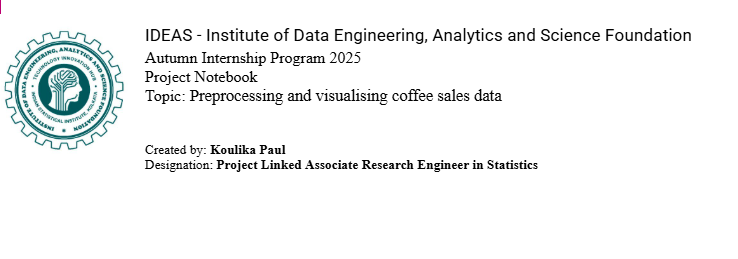

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# coffee_data=pd.read_csv("/content/Coffe_sales.csv")
coffee_data = pd.read_csv("/content/drive/MyDrive/content/Coffe_sales.csv")
coffee_data

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


**Q1. Find the number of columns, duplicate columns, and missing values**

In [9]:
columns = coffee_data.shape[1]
duplicate_columns = coffee_data.columns[coffee_data.T.duplicated()].tolist()
missing_values = coffee_data.isnull().sum()

print("Number of columns:", columns)
print("Duplicate columns:", duplicate_columns)
print("Missing values:\n", missing_values)


Number of columns: 11
Duplicate columns: []
Missing values:
 hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64


***Basic statistics of the data***

In [10]:
coffee_data.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [11]:
coffee_data.dtypes

,0
hour_of_day,int64
cash_type,object
money,float64
coffee_name,object
Time_of_Day,object
Weekday,object
Month_name,object
Weekdaysort,int64
Monthsort,int64
Date,object


In [12]:
coffee_data['Date']= pd.to_datetime(coffee_data['Date']) ## converting the object datatype to datetime
coffee_data['Month']=coffee_data['Date'].dt.month
coffee_data['Year']=(coffee_data['Date'].dt.year).astype('int')

***Average money for each year***

In [13]:
grouped_data=coffee_data.groupby('Year')['money'].agg(np.mean)
grouped_data

/tmp/ipython-input-3058338727.py:1: FutureWarning: The provided callable <function mean at 0x7c93317709a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped_data=coffee_data.groupby('Year')['money'].agg(np.mean)


,money
Year,
2024,31.737634
2025,31.390011


**Q2. Find the datatype of grouped_data**

In [14]:
type(grouped_data)
grouped_data.dtypes

dtype('float64')

**Q3. Find the maximum money for each month**

In [15]:
max_money =coffee_data.groupby('Month')['money'].max()
print(max_money)

Month
1     35.76
2     35.76
3     38.70
4     38.70
5     37.72
6     37.72
7     37.72
8     32.82
9     35.76
10    35.76
11    35.76
12    35.76
Name: money, dtype: float64


***Distribution of money over months***

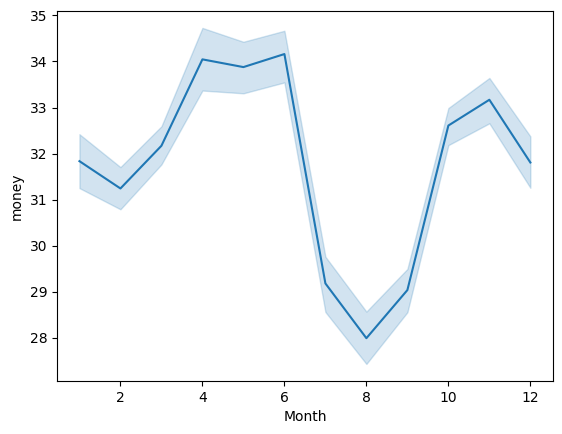

In [17]:
sns.lineplot(x=coffee_data['Month'],y='money',data=coffee_data)
plt.show()

***The density of money over years***

<Axes: xlabel='Year', ylabel='money'>

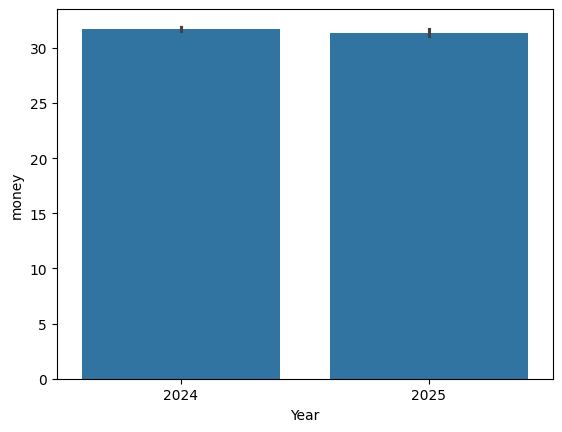

In [18]:
sns.barplot(data= coffee_data,x='Year',y= coffee_data['money'])


**Q4. Find the distribution of money over coffee names**


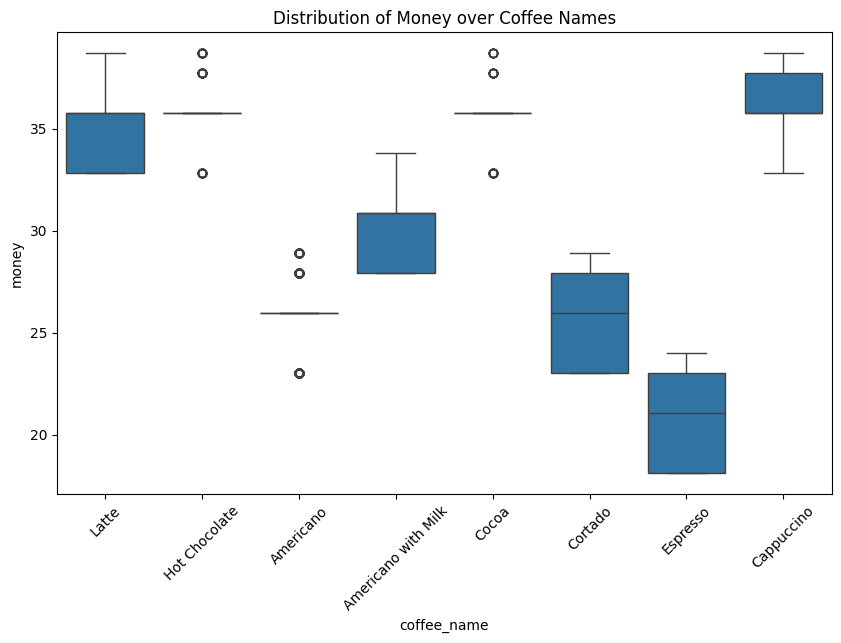

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(data=coffee_data, x='coffee_name', y='money')
plt.xticks(rotation=45)
plt.title("Distribution of Money over Coffee Names")
plt.show()

***Times of the Day the dataset holds***

In [ ]:
coffee_data['Time_of_Day'].value_counts()

,count
Time_of_Day,
Afternoon,1205
Morning,1181
Night,1161


**Q5. How many types of coffees are present in the dataset?**

In [20]:
types = coffee_data['coffee_name'].nunique()
print("Number of coffee types:", types)

Number of coffee types: 8


***Max money from coffee_name***

In [21]:
coffee_data.groupby('coffee_name')['money'].max()

,money
coffee_name,
Americano,28.9
Americano with Milk,33.8
Cappuccino,38.7
Cocoa,38.7
Cortado,28.9
Espresso,24.0
Hot Chocolate,38.7
Latte,38.7


**Q6. Find the average money made at what time of the day.**

In [22]:
avg = coffee_data.groupby('Time_of_Day')['money'].mean()

print(avg)

Time_of_Day
Afternoon    31.643187
Morning      30.422693
Night        32.890904
Name: money, dtype: float64


***Generate 100 synthetic data rows***

In [ ]:

date_range= date_range = pd.date_range(start="2023-01-01", periods=100, freq="D")
values = np.cumsum(np.random.randn(100))
df = pd.DataFrame({"date": date_range, "value": values})
df

,date,value
0,2023-01-01,1.166936
1,2023-01-02,1.573639
2,2023-01-03,1.246487
3,2023-01-04,2.082552
4,2023-01-05,1.597629
...,...,...
95,2023-04-06,-9.013257
96,2023-04-07,-8.219102
97,2023-04-08,-8.810398
98,2023-04-09,-8.505690


**Q7. Insert synthetic data into the given data set and analyse as above.**

In [47]:

date_range = pd.date_range(start="2023-01-01", periods=100, freq="D")

synthetic_df = pd.DataFrame({
    "hour_of_day": np.random.randint(6, 23, size=100),
    "cash_type": np.random.choice(coffee_data['cash_type'].unique(), size=100),
    "money": np.random.randint(25, 101, size=100),
    "coffee_name": np.random.choice(coffee_data['coffee_name'].unique(), size=100),
    "Time_of_Day": np.random.choice(coffee_data['Time_of_Day'].unique(), size=100),
    "Weekday": date_range.day_name(),
    "Month_name": date_range.month_name(),
    "Weekdaysort": date_range.weekday,
    "Monthsort": date_range.month,
    "Date": date_range,
    "Time": [f"{h:02d}:{m:02d}" for h, m in zip(np.random.randint(6, 23, size=100),
                                                np.random.randint(0, 60, size=100))]
})


In [48]:
synthetic_df['Date']= pd.to_datetime(coffee_data['Date'])
synthetic_df['Year']=(coffee_data['Date'].dt.year).astype('int')

In [49]:
coffee_data_new = pd.concat([coffee_data, synthetic_df], ignore_index=True)


print("Original data shape:", coffee_data.shape)
print("Synthetic data shape:", synthetic_df.shape)
print("Extended data shape:", coffee_data_new.shape)


Original data shape: (3547, 13)
Synthetic data shape: (100, 13)
Extended data shape: (3647, 13)


Q1. Find the number of columns, duplicate columns, and missing  ( for synthetic dataset )


In [50]:
columns = coffee_data_new.shape[1]
duplicate_columns = coffee_data_new.columns[coffee_data.T.duplicated()].tolist()
missing_values = coffee_data_new.isnull().sum()

print("Number of columns:", columns)
print("Duplicate columns:", duplicate_columns)
print("Missing values:\n", missing_values)

Number of columns: 13
Duplicate columns: ['Month']
Missing values:
 hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
Month          0
Year           0
dtype: int64


Q2. Find the datatype of grouped_data (for synthetic dataset)

---



In [51]:
type(grouped_data)
grouped_data.dtypes

dtype('float64')

Q3. Find the maximum money for each month (for synthetic dataset)

In [52]:
max_money =coffee_data_new.groupby('Month')['money'].max()
print(max_money)

Month
1      35.76
2      35.76
3     100.00
4      38.70
5      37.72
6      37.72
7      37.72
8      32.82
9      35.76
10     35.76
11     35.76
12     35.76
Name: money, dtype: float64


Q4. Find the distribution of money over coffee names (for synthetic dataset)

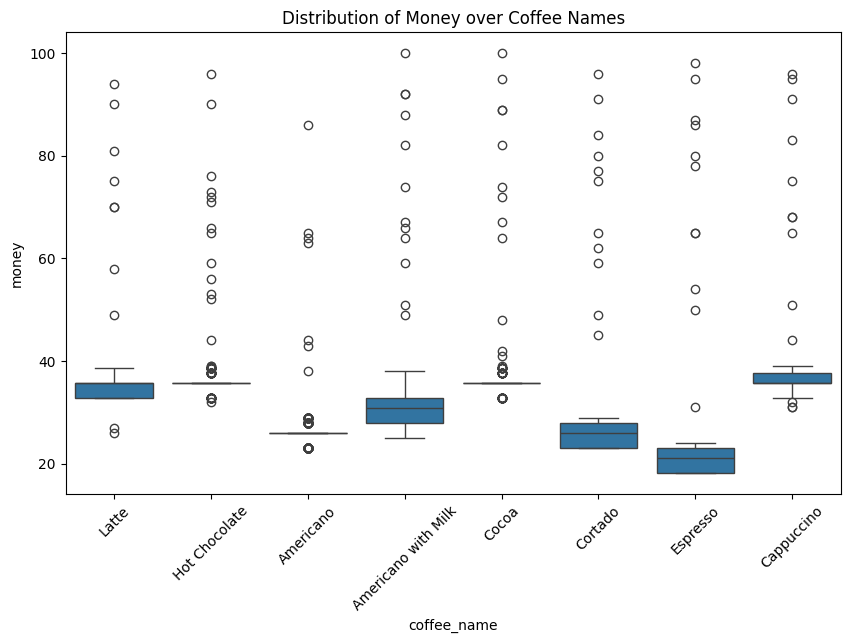

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(data=coffee_data_new, x='coffee_name', y='money')
plt.xticks(rotation=45)
plt.title("Distribution of Money over Coffee Names")
plt.show()

Q5. How many types of coffees are present in the dataset? (for synthetic dataset)

In [54]:
types = coffee_data_new['coffee_name'].nunique()
print("Number of coffee types:", types)

Number of coffee types: 8


Q6. Find the average money made at what time of the day.
(for synthetic dataset)

In [57]:
avg = coffee_data_new.groupby('Time_of_Day')['money'].mean()
print(avg)

Time_of_Day
Afternoon    32.689438
Morning      31.248515
Night        33.705921
Name: money, dtype: float64


# Inferential Anyalysis of the data

Chi-Square Goodness-of-Fit


In [4]:
import scipy.stats as stats
import numpy as np

observed = coffee_data['hour_of_day'].value_counts().sort_index()
expected = np.ones_like(observed) * observed.mean()
chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)

print("Chi-square:", chi2, "p-value:", p)

Chi-square: 464.7076402593741 p-value: 9.201567717608249e-89



A Chi-Square Goodness-of-Fit test was conducted to assess whether coffee sales were evenly distributed across the hours of the day. The analysis produced a Chi-Square statistic of 464.71 with a p-value of 9.20 × 10⁻⁸⁹, which is far below the conventional significance threshold of 0.05. This result provides strong evidence against the null hypothesis of uniform sales, indicating that coffee purchases are not evenly spread throughout the day. Instead, sales are heavily concentrated during mid-day hours (10 AM – 6 PM), with a pronounced peak occurring around 2 PM, suggesting a strong post-lunch demand pattern.


ANOVA for Weekday Spending

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('money ~ C(Weekdaysort)', data=coffee_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                      sum_sq      df        F    PR(>F)
C(Weekdaysort)    120.692276     6.0  0.84523  0.534789
Residual        84247.446034  3540.0      NaN       NaN


A one-way ANOVA test was conducted to determine whether average customer spending varied significantly across different weekdays. The results showed an F-statistic of 0.85 with a p-value of 0.53, which is well above the conventional significance level of 0.05. This indicates that there is no statistically significant difference in spending across weekdays. In other words, customer expenditure remains relatively consistent throughout the week, suggesting that weekday does not influence how much customers spend on coffee purchases.

Correlation between Money & Hour

In [6]:
corr = coffee_data['money'].corr(coffee_data['hour_of_day'])
print("Correlation:", corr)

Correlation: 0.20274793514276113


 A correlation analysis was carried out to examine the relationship between the amount of money spent and the hour of purchase. The correlation coefficient was found to be 0.20, indicating a weak positive relationship between the two variables. This suggests that while spending tends to increase slightly during later hours of the day, the effect is minimal and not strong enough to indicate a meaningful dependency. Overall, the time of purchase does not substantially influence the amount customers spend on coffee.